# Assignment 15 (Random Forests) Q2. Fraud_Check

## Q2. Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 

## Data collection and description 

In [2]:
# Loading the dataset
fraud_df = pd.read_csv("Fraud_check.csv")

In [3]:
fraud_df1 = fraud_df.copy()

In [4]:
fraud_df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# Summary Statistics
fraud_df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
# Checking for null values
fraud_df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
# Checking the datatypes of each column
fraud_df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

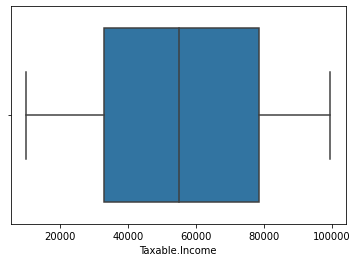

In [8]:
# Checking for Outliers
ax = sns.boxplot(fraud_df1['Taxable.Income'])

## There are no Outliers in this Data 

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: 0.030014788906377175
Kurtosis: -1.1997824607083138


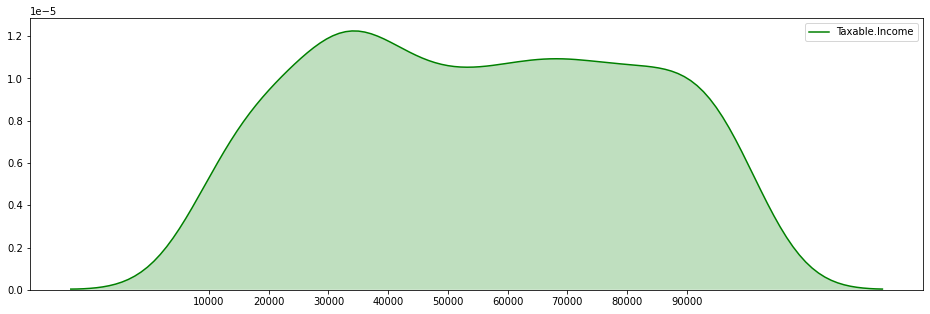

In [10]:
# Plotting Graphs
plt.figure(figsize=(16,5))
print("Skewness: {}".format(fraud_df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fraud_df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(fraud_df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

## The Data is Skewed on the Right
## The Data has Negative Kurtosis

In [11]:
obj_column = fraud_df1.select_dtypes(include='object').columns.tolist()

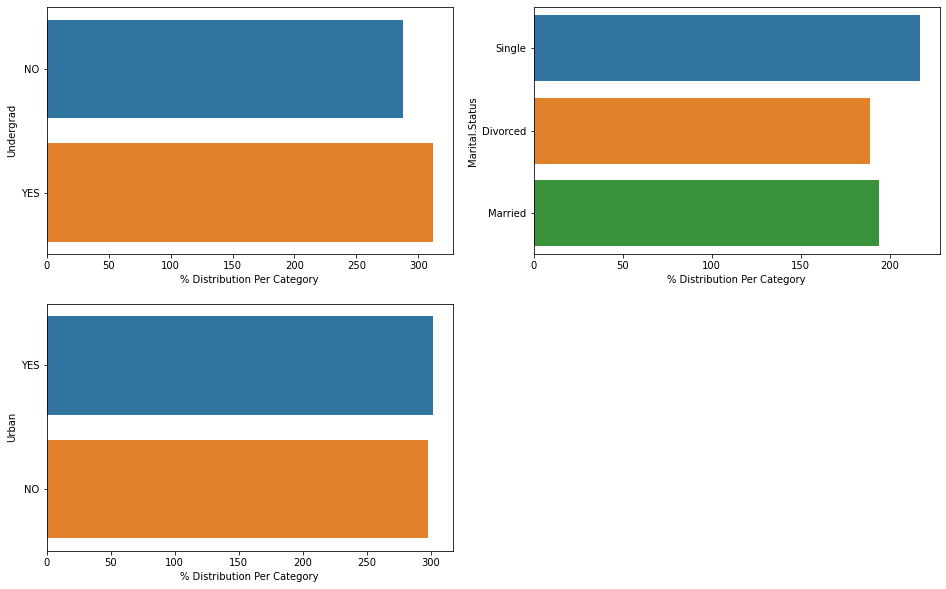

In [12]:
# Plotting Graphs
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fraud_df1,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

## From above graph 'Undergrad' column has more distribution per category for 'Yes'. 'Marital.Status' has more distribution per category for 'Single' and in 'Urban' column distribution is approximately equal for both value types. 

In [13]:
num_columns = fraud_df1.select_dtypes(exclude='object').columns.tolist()

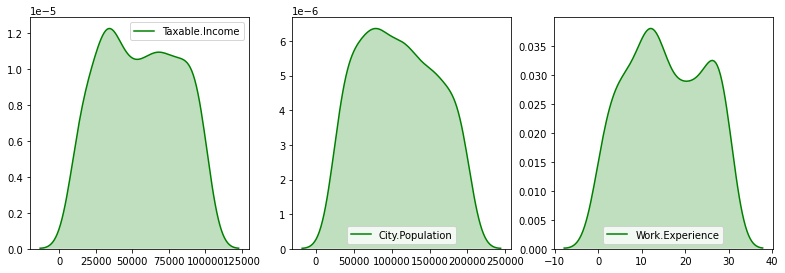

,Taxable.Income,City.Population,Work.Experience
Skewness,0.030015,0.125009,0.018529
Kurtosis,-1.199782,-1.120154,-1.167524


In [14]:
# Plotting Graphs
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fraud_df[col],color='g',shade=True) 
plt.show()
num_data = fraud_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## From above graphs we can say that all the columns Taxable.Income, City.Population and Work.Experience have negative kurtosis.  

In [15]:
# One hot encoding
fraud_df1 = pd.get_dummies(fraud_df1, columns = ['Undergrad','Marital.Status','Urban'])

## Correlation Analysis 

<AxesSubplot:>

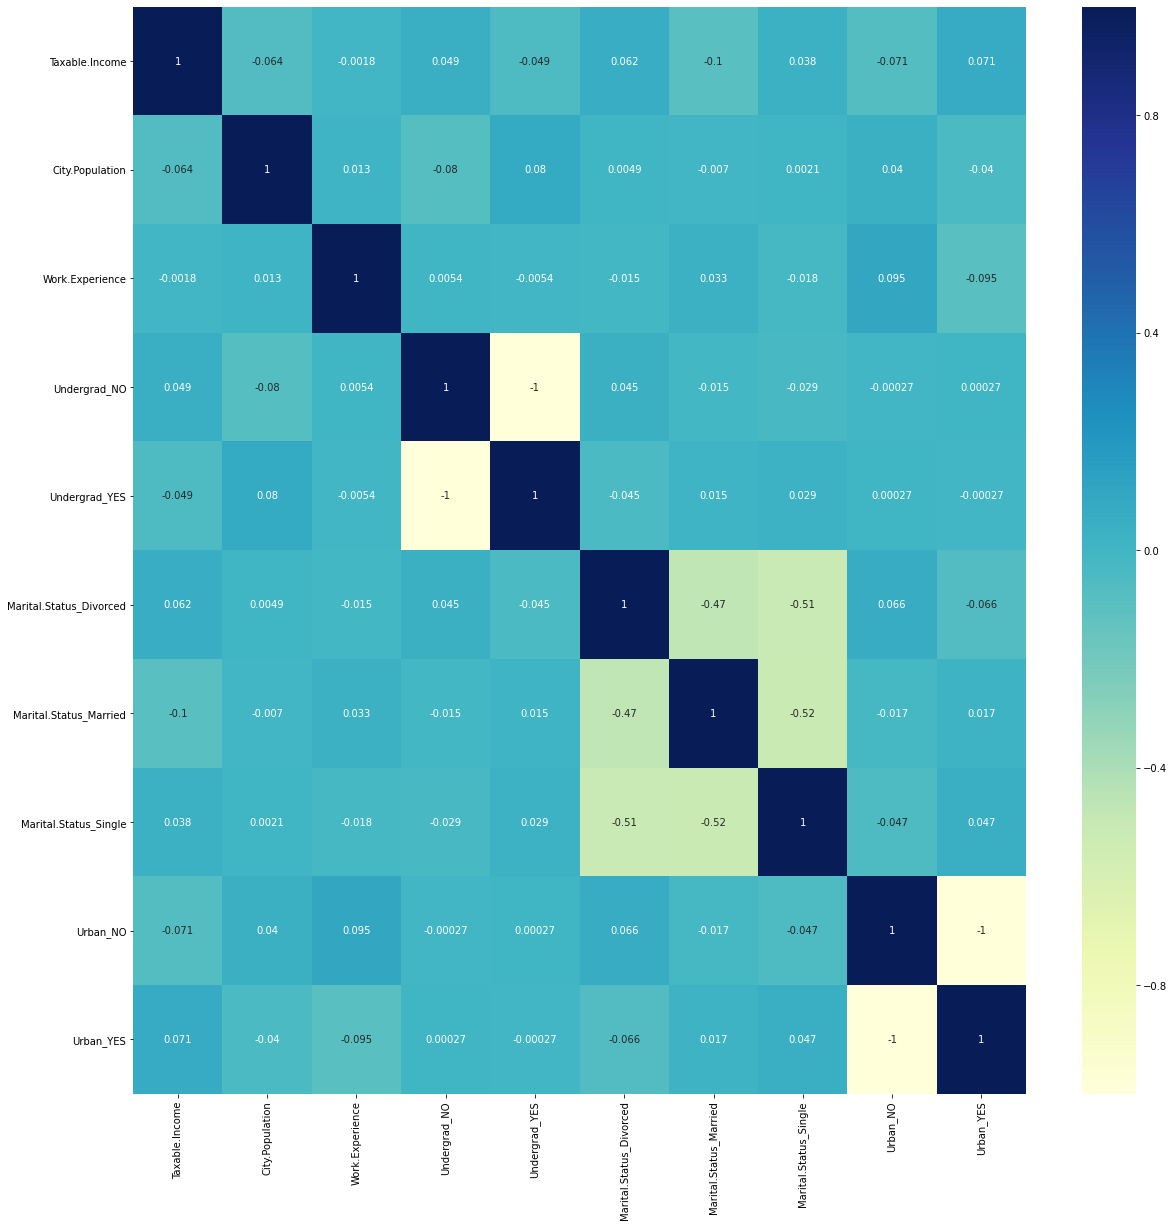

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_df1.corr(),cmap='YlGnBu',annot=True)

## Random Forest Model
## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [17]:
fraud_df1['Taxable.Income']=pd.cut(fraud_df1['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])

In [18]:
list(fraud_df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [19]:
x = fraud_df1.iloc[:,1:10]
y = fraud_df1.iloc[:,0]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
y_train.value_counts()

Good     375
Risky    105
Name: Taxable.Income, dtype: int64

In [22]:
# Building Model
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.71875

In [23]:
pred_train = model.predict(x_train)

In [24]:
pred_train

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',

In [25]:
accuracy_score(y_train,pred_train)

1.0

In [26]:
confusion_matrix(y_train,pred_train)

array([[375,   0],
       [  0, 105]], dtype=int64)

In [27]:
pred_test = model.predict(x_test)

In [28]:
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',


In [29]:
accuracy_score(y_test,pred_test)

0.8083333333333333

In [30]:
confusion_matrix(y_test,pred_test)

array([[96,  5],
       [18,  1]], dtype=int64)

In [31]:
fraud_df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [32]:
fraud_df2

,Actual,Predicted
355,Good,Good
443,Risky,Good
49,Good,Good
442,Good,Good
290,Good,Good
258,Good,Good
151,Good,Good
293,Good,Good
15,Good,Good
18,Good,Good


In [33]:
cols = list(fraud_df1.columns)

In [34]:
predictors = cols[1:10]
target = cols[0]

In [35]:
tree1 = model.estimators_[20]

In [36]:
dot_data = StringIO()

In [37]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [39]:
graph.write_png('Fraud_Check.png')

True

## Conclusion
## Since the accuracy of the Training set is 100% we test the accuracy on the test data which is 80%
## As seen in the confusion matrix of Test data 97 instances are predicted correctly and 23 instances are not 

In [40]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [41]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
tree_small = rf_small.estimators_[5]

In [43]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [44]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [45]:
graph.write_png('Fraud_Check1.png')

True

In [46]:
img = mpimg.imread('Fraud_Check1.png')

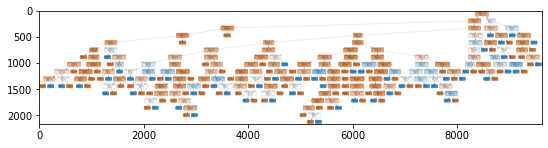

In [47]:
plt.imshow(img)

In [48]:
model.feature_importances_

array([0.524553  , 0.35679357, 0.01685808, 0.01603553, 0.01609589,
       0.0183491 , 0.01825711, 0.01677564, 0.01628209])

In [49]:
feature_imp = pd.DataFrame({'Feature': list(x_train.columns),
                   'Importance': model.feature_importances_}).\
                    sort_values('Importance', ascending = False)

In [50]:
feature_imp

,Feature,Importance
0,City.Population,0.524553
1,Work.Experience,0.356794
5,Marital.Status_Married,0.018349
6,Marital.Status_Single,0.018257
2,Undergrad_NO,0.016858
7,Urban_NO,0.016776
8,Urban_YES,0.016282
4,Marital.Status_Divorced,0.016096
3,Undergrad_YES,0.016036


## As seen in the above Table City.Population is most Important Feature 